Nous avons maintenant une idée plus précise de notre jeu de données.  

Dans ce notebook nous allons effectuer un clustering sur nos données suivant deux méthodes, la classification hiérarchique ascendante et le K-means, dans le but d'obtenir des groupes de pays avec des caractéristiques similaires.

Nous repartons de nos données centrées-réduites et nous utiliserons l'ACP pour visualiser le résultat de notre culstering sur le premier plan factoriel F1F2.
L'une des deux méthodes de clustering sera retenue, à partir de laquelle nous analyserons plus en profondeur les clusters.

## Sommaire

* [Étapes préliminaires](#Chapter1)
    * [Importation des librairies](#section_1_1)
    * [Importation des données](#section_1_2)
* [Clustering](#chapter2)
    * [Méthode Classification hiérarchique ascendante](#section_2_1)
    * [Méthode K-means](#section_2_2)
* [Projection nuage des invidivus avec clusters](#chapter3)
* [Quelle méthode choisir ?](#chapter4)
* [Analyse clusters K-means](#chapter5)
* [Conclusion](#chapter6)

## Étapes préliminaires <a class="anchor" id="chapter1"></a>

## Importation des librairies <a class="anchor" id="section_1_1"></a>

In [1]:
# Manipulation des données
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import datasets
from sklearn import cluster, metrics

# Classification ascendante hiérarchique
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Représentation graphique
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Importation des données <a class="anchor" id="section_1_2"></a>

In [2]:
# On récupère le fichier final issu du nettoyage
df_final = pd.read_csv("C:/Users/jorda/P9/Data/df_final1.csv", index_col=0, sep = ',')

# On récupère les données centrées-réduites
df_X_scaled = pd.read_csv("C:/Users/jorda/P9/Data/df_X_scaled.csv", index_col=0, sep = ',')

# On récupère les données pays outliers
df_outliers = pd.read_csv("C:/Users/jorda/P9/Data/df_outliers.csv", index_col=0, sep = ',')

In [3]:
df_X_scaled.head(3)

,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab
Pays,,,,,,,
Afrique du Sud,0.787957,1.153448,2.323763,-0.361568,0.077922,-0.295113,-0.422512
Albanie,-0.549078,0.167974,-0.511561,0.473774,0.740833,0.466064,-0.504824
Algérie,0.402091,-0.902456,-0.196677,-0.754278,-0.912866,-1.033224,-0.525535


## Clustering <a class="anchor" id="chapter2"></a>

## Méthode Classification hiérarchique ascendante (CAH) <a class="anchor" id="section_2_1"></a>

Pour la classification hiérarchique ascendante (CAH) on utilise la méthode de Ward. Au départ, chaque point est un cluster puis de manière itérative on regroupe des clusters entre eux de manière à minimiser la diminution de l'intertie inter. On commence par appliquer cette méthode jusqu'à obtenir un seul cluster et on représente le résultat à l'aide d'un dendrogramme.

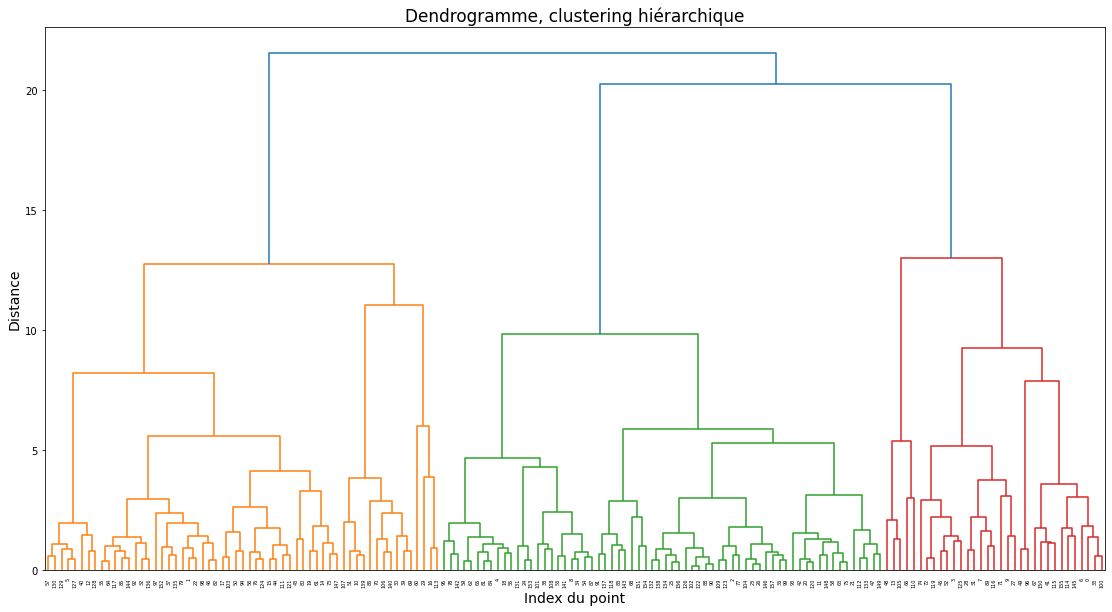

In [4]:
# On récupère les valeurs du dataframe df_X_scaled
X_scaled = df_X_scaled.values

# On utilise linkage pour calculer la distance entre les points et les relier entre eux
Z = linkage(X_scaled, method="ward")

# On représente le linkage réalisé sous forme de dendrogramme
plt.figure(figsize=(19, 10))

dendrogram(Z)

plt.title("Dendrogramme, clustering hiérarchique", fontsize=17)
plt.xlabel("Index du point", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.show()

Le dendrogramme nous montre la manière dont les regroupements ont été effectués, d'après ce que l'on observe on pourrait diviser notre arbre en trois clusters comme indiqué. Cependant, nous pouvons voir dans les parties oranges et rouges des regroupements effectués entre des groupes de pays ayant une grande distance entre eux, on décide donc de couper notre arbre à une distance de 11 environ et nous obtenons ainsi une partition en 6 clusters.  

Maintenant que nous avons déterminé le nombre de clusters adéquat, on lance l'algorithme de clustering pour cette partition.

In [5]:
# On instancie avec un nombre de cluster égal à 6
cah = AgglomerativeClustering(n_clusters=6, linkage="ward")

# On fit
cah.fit(X_scaled)

# On affiche les numéros de clusters attribués à chaque individus
cah.labels_

array([1, 4, 0, 1, 0, 4, 1, 1, 0, 1, 5, 0, 4, 3, 4, 4, 2, 4, 0, 4, 0, 0,
       4, 0, 0, 0, 0, 1, 1, 2, 5, 1, 4, 1, 0, 4, 0, 4, 0, 5, 4, 1, 0, 4,
       4, 1, 4, 0, 3, 1, 4, 5, 1, 0, 0, 0, 4, 4, 0, 0, 2, 4, 0, 0, 4, 0,
       3, 1, 0, 5, 5, 1, 1, 4, 1, 0, 4, 0, 0, 4, 4, 0, 4, 0, 0, 4, 5, 0,
       0, 1, 0, 0, 4, 0, 4, 0, 1, 4, 4, 0, 1, 0, 0, 4, 0, 3, 5, 5, 0, 0,
       3, 4, 0, 2, 1, 1, 1, 4, 0, 1, 0, 4, 0, 0, 4, 1, 0, 4, 4, 4, 4, 0,
       0, 0, 0, 4, 4, 0, 0, 5, 5, 0, 0, 0, 4, 1, 0, 4, 0, 0, 1, 0, 4, 0,
       0, 1, 0, 0], dtype=int64)

In [6]:
# On crée un dataframe à partir des données centrées-réduites
df_cah = pd.DataFrame(X_scaled, columns= df_final.columns, index= df_final.index)

# On ajoute la colonne "cluster" avec le numéro de cluster attribué à chaque individus
df_cah["cluster"] = cah.labels_
df_cah.head(3)

,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab,cluster
Pays,,,,,,,,
Afrique du Sud,0.787957,1.153448,2.323763,-0.361568,0.077922,-0.295113,-0.422512,1
Albanie,-0.549078,0.167974,-0.511561,0.473774,0.740833,0.466064,-0.504824,4
Algérie,0.402091,-0.902456,-0.196677,-0.754278,-0.912866,-1.033224,-0.525535,0


## Méthode K-means <a class="anchor" id="section_2_2"></a>

Pour cette méthode on commence par placer aléatoirement un nombre de centroïdes (centre de gravité) égal au nombre de clusters souhaité, parmis nos points. Ensuite on regroupe les points les plus proches de chaque centroïde, on calcul la position du nouveau centre de gravité et on déplace le centroïde sur la nouvelle position. On répète ce proccessus de manière itérative jusqu'à convergence de l'algorithme.

Pour déterminer le nombre de cluster adéquat on fait fonctionner l'algorithme pour différents nombres de cluster et on choisit celui avec les meilleurs résultats.  
On regarde tout d'abord le coefficient de silhouette.

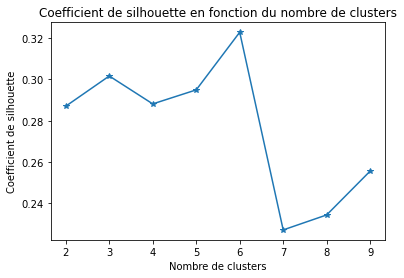

In [7]:
# On crée une liste vide
silhouette = []

# Pour chaque tour de boucle on lance l'algorithme du kmeans pour un nombre de clusters donnée et on calcul le silhouette score
# Puis on stocke la valeur dans la liste sihlouette
for i in range(2, 10):
    cls = cluster.KMeans(n_clusters= i, n_init=10, init='random', random_state= 10).fit(X_scaled)
    
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouette.append(silh)

# On affiche le silhouette score pour chaque nombre de cluster
plt.plot(range(2, 10), silhouette, marker="*")
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouette")
plt.title("Coefficient de silhouette en fonction du nombre de clusters")
plt.show()

Un regroupement avec 6 clusters possède le plus haut coefficient de silhouette et serait donc le plus approprié.  

Il est également possible d'utiliser la méthode du coude, pour cela on commence par représenter l'inertie pour chaque nombre de clusters.

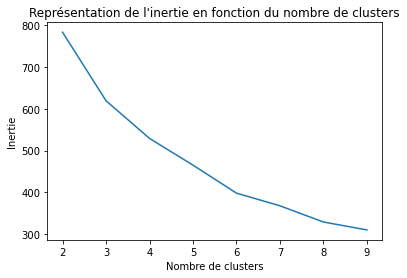

In [8]:
# On crée une liste vide
inertie = []

# Pour chaque tour de boucle on lance l'algorithme du kmeans pour un nombre de clusters donnée et on calcul l'inertie
# Puis on stocke la valeur dans la liste inertie
for i in range(2, 10):
    model = cluster.KMeans(n_clusters= i, n_init= 10, init='random', random_state= 10).fit(X_scaled)
    inertie.append(model.inertia_)

# On affiche l'inertie pour chaque nombre de clusters
plt.plot(range(2, 10), inertie)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Représentation de l'inertie en fonction du nombre de clusters")
plt.show()

On observe un coude pour un nombre de 6 clusters ce qui est cohérent avec le coefficient de silhouette. Cette donc cette partition qui est retenue.

In [9]:
# On instancie l'algorithme pour 6 clusters
cls = cluster.KMeans(n_clusters=6, n_init=10, init='random', random_state= 10)

# On fit
cls.fit(X_scaled)

KMeans(init='random', n_clusters=6, random_state=10)

In [10]:
# On crée un dataframe à partir des données centrées-réduites
df_k_means = pd.DataFrame(X_scaled, columns= df_final.columns, index= df_final.index)

# On ajoute la colonne "cluster" avec le numéro de cluster pour chaque individus
df_k_means["cluster"] = cls.labels_
df_k_means.head(3)

,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab,cluster
Pays,,,,,,,,
Afrique du Sud,0.787957,1.153448,2.323763,-0.361568,0.077922,-0.295113,-0.422512,3
Albanie,-0.549078,0.167974,-0.511561,0.473774,0.740833,0.466064,-0.504824,0
Algérie,0.402091,-0.902456,-0.196677,-0.754278,-0.912866,-1.033224,-0.525535,1


Maintenant que le clustering est réalisé suivant les deux méthodes, nous procédons à une analyse en composantes principales (ACP) pour visualiser les résultats sur le premier plan factoriel F1-F2.

## Projection du nuage des individus sur F1 F2 avec les clusters CAH et Kmeans <a class="anchor" id="chapter3"></a>

In [11]:
# On instancie
pca = PCA(n_components= 2)

# On entraine
pca.fit(X_scaled)

# projeter X_scaled sur les composantes principales
X_proj = pca.transform(X_scaled)

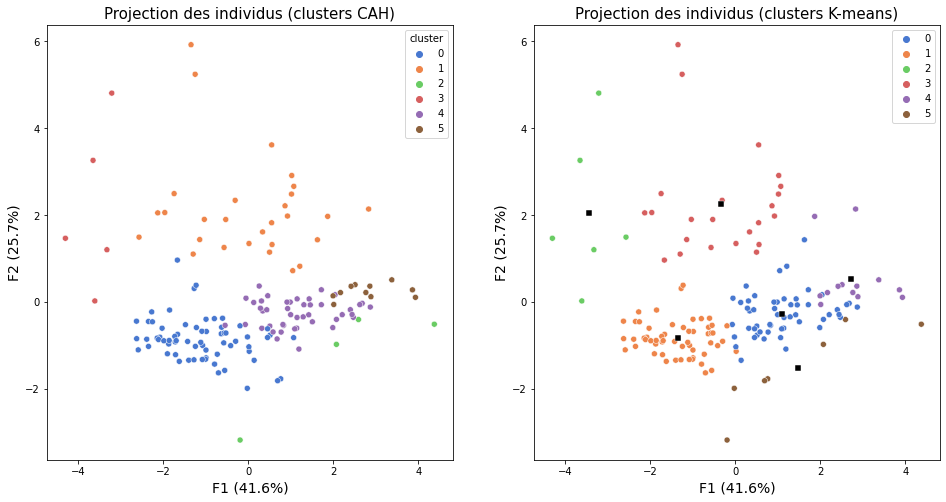

In [12]:
# On ajoute au dataframe X_proj une colonne avec les clusters de la CAH
X_proj_cah = pd.DataFrame(X_proj, columns = ["F1", "F2"], index = df_final.index)
X_proj_cah["cluster"] = cah.labels_

# On ajoute au dataframe X_proj une colonne avec les clusters du Kmeans
X_proj_kmeans = pd.DataFrame(X_proj, columns = ["F1", "F2"], index = df_final.index)
X_proj_kmeans["cluster"] = cls.labels_

# On récupère les controides du kmeans et on calcul leurs coordonnées sur F1 et F2
centroids = cls.cluster_centers_
centroids_proj = pca.transform(centroids)
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2"], 
                              index=["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"])

# On représente nos individus sur le premier plan factoriel
plt.figure(figsize=(16, 8))

# Projection avec les clusters de la classification hiérarchique
plt.subplot(121)
plt.title("Projection des individus (clusters CAH)", fontsize=15)

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize= 14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize= 14)

sns.scatterplot(data= X_proj_cah, x="F1", y="F2", hue="cluster", palette="muted") # Nuage des individus

# Projections avec les clusters du K-means
plt.subplot(122)
plt.title("Projection des individus (clusters K-means)", fontsize=15)

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize= 14)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize= 14)

sns.scatterplot(data= X_proj_kmeans, x="F1", y="F2", hue="cluster", palette="muted") # Nuage des individus
sns.scatterplot(data= centroids_proj, x="F1", y="F2", marker="s", color="black", s=33) # On affiche les centroïdes

plt.show()

On observe que les clusters ne se chevauchent pas sur F1F2, et le clustering semble assez similaire d'une méthode à l'autre.

Les pays des clusters 1 et 3 (CAH) et 2 et 3 (Kmeans) sont dans la partie haute est représenteraient les plus gros marchés d'après le cercle des corrélations.
De plus, parmis les marchés de plus petite taille, ceux des cluster 0 (classification) et 1 (Kmeans) auront tendance à avoir des situations politico-économique et un régime alimentaire moins indiqués pour l'exportation des poulets.

## Quelle méthode de clustering choisir ? <a class="anchor" id="chapter4"></a>

Nous avons appliqué deux méthodes de clusterings, classification ascendante hiérarchique et Kmeans, nous devons maintenant choisir quel ensemble de clusters analyser plus spécifiquement.

Pour ce faire, nous comparons la qualité de clustering des deux méthodes (pour 6 clusters) à l'aide de l'indice de Davis-Bouldin (indice proche de 0 = bonne qualité) et du silhouette score (ici on veut un score élevé).

In [13]:
# Calcul de l'indice de Davies-Bouldin
print("\033[1mIndice de Davies-Bouldin:\033[0m")
print("Classification hiérarchique:", round(metrics.davies_bouldin_score(X_scaled, cah.labels_), 3))
print("Kmeans:", round(metrics.davies_bouldin_score(X_scaled, cls.labels_), 3))

print("----------------------------------")

# Calcul du coefficient de silhouette
print("\033[1mCoefficient de silhouette:\033[0m")
print("Classification hiérarchique:", round(metrics.silhouette_score(X_scaled, cah.labels_), 3))
print("Kmeans:", round(metrics.silhouette_score(X_scaled, cls.labels_), 3))

Indice de Davies-Bouldin:
Classification hiérarchique: 1.037
Kmeans: 1.038
----------------------------------
Coefficient de silhouette:
Classification hiérarchique: 0.287
Kmeans: 0.323


Pour 6 clusters, l'indice de Davies-Bouldin est similaire pour les deux méthodes mais le coefficient de silhouette du K-means est supèrieur à celui de la classification hiérarchique. À partir de ces informations, on décide de poursuivre l'analyse avec les clusters du K-means.

## Analyse des clusters du K-means <a class="anchor" id="chapter5"></a>

In [14]:
df_k_means.head(3)

,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab,cluster
Pays,,,,,,,,
Afrique du Sud,0.787957,1.153448,2.323763,-0.361568,0.077922,-0.295113,-0.422512,3
Albanie,-0.549078,0.167974,-0.511561,0.473774,0.740833,0.466064,-0.504824,0
Algérie,0.402091,-0.902456,-0.196677,-0.754278,-0.912866,-1.033224,-0.525535,1


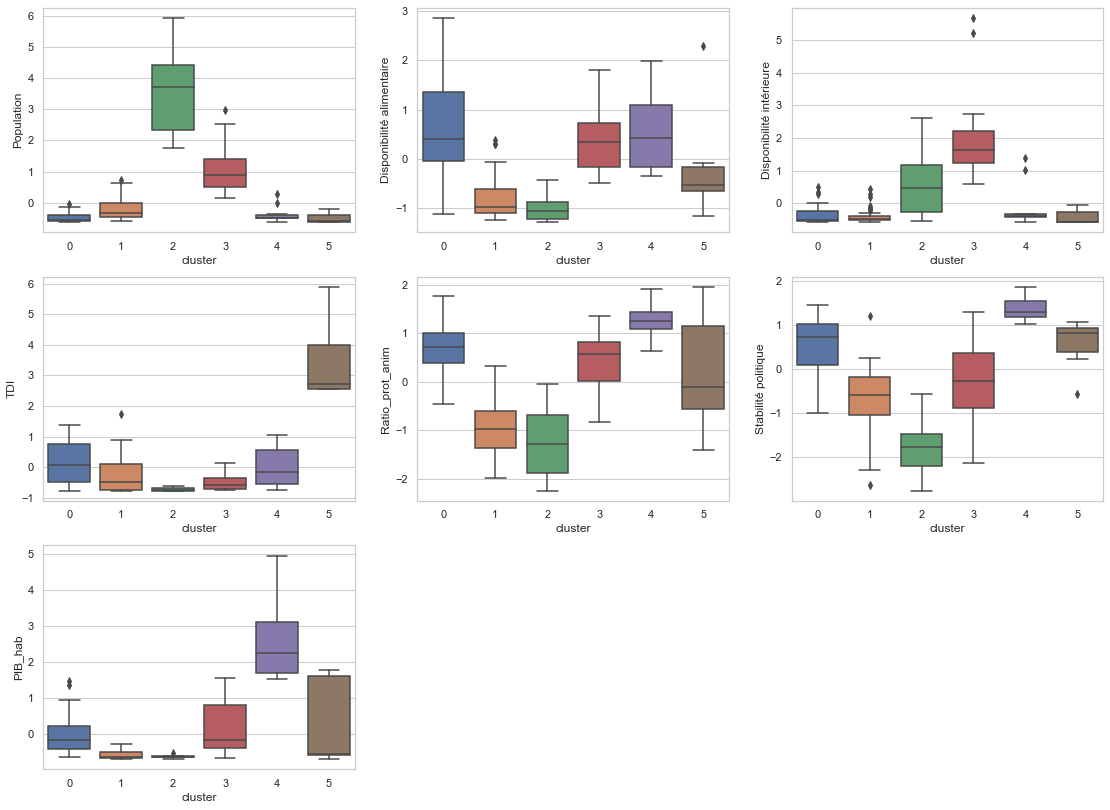

In [15]:
# Création de boxplot
plt.figure(figsize=(19, 14))

sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=df_k_means, x="cluster", y="Population")

plt.subplot(332)
sns.boxplot(data=df_k_means, x="cluster", y="Disponibilité alimentaire")

plt.subplot(333)
sns.boxplot(data=df_k_means, x="cluster", y="Disponibilité intérieure")

plt.subplot(334)
sns.boxplot(data=df_k_means, x="cluster", y="TDI")

plt.subplot(335)
sns.boxplot(data=df_k_means, x="cluster", y="Ratio_prot_anim")

plt.subplot(336)
sns.boxplot(data=df_k_means, x="cluster", y="Stabilité politique")

plt.subplot(337)
sns.boxplot(data=df_k_means, x="cluster", y="PIB_hab")

plt.show()

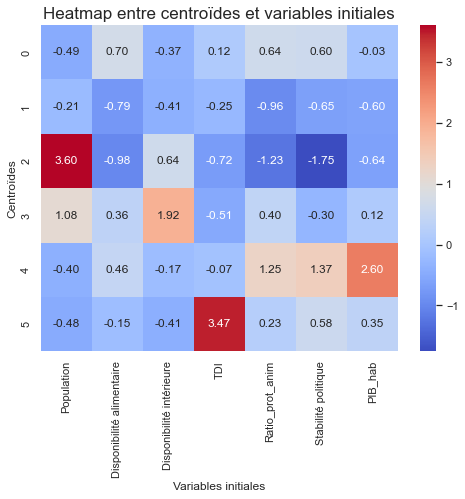

In [16]:
df_centroids = pd.DataFrame(centroids, 
                              columns = df_final.columns, 
                              index=["0", "1", "2", "3", "4", "5"])

# Création heatmap entre centroïdes et variables initiales
plt.figure(figsize=(8, 6))

sns.heatmap(df_centroids, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title("Heatmap entre centroïdes et variables initiales", fontsize=17)
plt.xlabel("Variables initiales", fontsize=12)
plt.ylabel("Centroïdes", fontsize=12)
plt.show()

### Observations

À l'aide du nuage de point, des boxplot et de la heatmap ci-dessus nous pouvons décrire les clusters ainsi:  


#### <span style='color:SteelBlue'> Cluster 0  </span>
-  Populations et disponibilités intérieure faible.
-  Taux de dépendance aux importations relativement élevé.
-  PIB faible et stabilité politique élevée.
-  Disponibilité alimentaire et part des protéines animales dans l'alimentation élevées.  


#### <span style='color: Peru'> Cluster 1  </span> 

-  Populations et disponibilités intérieure faible. 
-  Taux de dépendance aux importations faible.
-  PIB des plus faibles et stabilité politique faible.
-  Disponibilité alimentaire et part de protéines animales très faibles.

#### <span style='color:SeaGreen'> Cluster 2  </span>  

-  Populations les plus élevées et disponibilités intérieures élevées. 
-  Taux de dépendance aux importations des plus faibles.
-  PIB et stabilité politique des plus faibles.
-  Disponibilité alimentaire et part des protéines animales dans l'alimentation des plus faibles.  


#### <span style='color:Brown'> Cluster 3  </span>  

-  Populations élevées et disponibilités intérieures élevées. 
-  Taux de dépendance aux importations très faible.
-  PIB et stabilité politique relativement faibles.
-  Disponibilité alimentaire et part des protéines animales élevés.  

#### <span style='color:RebeccaPurple'> Cluster 4  </span>  

-  Populations et disponibilités intérieures faibles. 
-  Taux de dépendance aux importations relativement élevé.
-  PIB les plus importants et stabilité politique des plus élevée.
-  Disponibilité alimentaire et part des protéines animales élevées. 

#### <span style='color:RosyBrown'> Cluster 5  </span>  

-  Populations et disponibilités intérieures faibles. 
-  Taux de dépendance aux importations des plus élevés.
-  PIB faible (médiane très faible) et stabilité politique relativement élevée.
-  Disponibilité alimentaire et part des protéines animale faibles. 

#### Quel groupe de pays retenir ?  

Les clusters 2 et 3 sont composés de pays à fortes populations, ce qui indiquerai un grands nombre de consommateurs potentiels. Cependant, leurs faibles TDI et/ou PIB_hab ne nous permettent pas de retenir ces groupes de pays. De plus, les pays du cluster 2 ont un régime alimentaire qui n'est pas adapté.

Le clusters 1 est également écarté en raison des ses trop faibles TDI et PIB_hab.

Le cluster 5 se distingue par ses TDI très élevés mais les pays de ce clusters sont trop disparates (nuage de points) et peu nombreux et au moins la moitié a des PIB_hab, Population et Disponibilité intérieure parmis les plus faibles (médianes très basses au niveau du boxplot). Cela signifie que dans ce groupe de pays déja restreint (7 pays), une petite part seulement pourrai être intéressante pour poursuivre l'étude de marché. On décide donc de ne pas retenir ce groupe.

Les pays des clusters 0 et 4 semblent les plus intéressants.  
-  Leurs habitants sont des gros consommateurs de volailles (fortes disponibilités alimentaires et part de protéines animales). 
-  Ils ont des stabilités politiques des plus élevées, ce qui permettera de trouver plus facilement des partenaires commerciaux.
-  Il ont des taux de dépendance aux importations acceptables relativement à d'autre groupes de pays.  

Parmis ces deux clusters, on choisit de se concentrer sur les pays du cluster 4. Ces pays ont des PIB_hab nettement plus importants que ceux du cluster 0 (distribution de valeurs supérieure et valeurs du centroïde très supérieure), il sera donc plus facile de vendre nos produits dans ces pays.

### Analyse plus spécifique sur les pays du cluster 4

In [17]:
# On sélectionne les pays du cluster 4
df_cluster4 = df_k_means.loc[df_k_means["cluster"] == 4]

# On stocke les noms de ces pays
liste = df_cluster4.index

# On récupère les données initiales de ces pays ( données non centrées-réduites)
df_cluster4 = df_final.loc[df_final.index.isin(liste)]
df_cluster4.sort_values(by="TDI", ascending= False) # On classe selon le taux de dépendance aux importations

,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab
Pays,,,,,,,
Luxembourg,591910.0,69.0,11.0,110.0,62.11,1.33,111017.182246
Chine - RAS de Macao,622585.0,142.0,19.0,88.5,65.25,1.43,81043.968656
Irlande,4753279.0,100.0,128.0,85.3,60.52,1.00,70568.302444
Danemark,5732274.0,112.0,167.0,79.6,66.03,0.87,57938.797728
Autriche,8819901.0,65.0,173.0,61.1,59.53,1.05,47309.051637
Suède,9904896.0,61.0,187.0,38.5,64.46,0.98,54621.345824
Suisse,8455804.0,55.0,133.0,37.0,62.52,1.26,83313.013992
Islande,334393.0,104.0,10.0,16.7,72.73,1.35,73949.769216
Canada,36732095.0,154.0,1433.0,12.7,52.93,1.10,44906.748920


Dans ce groupe, la Norvège, l'Australie et la Nouvelle-Zélande ont des taux de dépendance aux importations très faibles (< 2 %), on décide de les exclure du groupe.

In [18]:
# On met à jour notre dataframe
liste = ["Norvège", "Australie", "Nouvelle-Zélande"]
df_cluster4 = df_cluster4.loc[~ df_cluster4.index.isin(liste)]
df_cluster4 = df_cluster4.sort_values(by="TDI", ascending= False)
print("Voici les",df_cluster4.shape[0], "pays retenus:")
df_cluster4

Voici les 10 pays retenus:


,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab
Pays,,,,,,,
Luxembourg,591910.0,69.0,11.0,110.0,62.11,1.33,111017.182246
Chine - RAS de Macao,622585.0,142.0,19.0,88.5,65.25,1.43,81043.968656
Irlande,4753279.0,100.0,128.0,85.3,60.52,1.00,70568.302444
Danemark,5732274.0,112.0,167.0,79.6,66.03,0.87,57938.797728
Autriche,8819901.0,65.0,173.0,61.1,59.53,1.05,47309.051637
Suède,9904896.0,61.0,187.0,38.5,64.46,0.98,54621.345824
Suisse,8455804.0,55.0,133.0,37.0,62.52,1.26,83313.013992
Islande,334393.0,104.0,10.0,16.7,72.73,1.35,73949.769216
Canada,36732095.0,154.0,1433.0,12.7,52.93,1.10,44906.748920


#### Quelques observations:  

- Le Luxembourg est **le plus dépendant aux importations** (110 %) et possède le **PIB** par habitants **le plus élevé** (111017$).
- Le Luxembourg, la Chine-RAS de Macao, l'Irlande, le Danemark et l'Autriche on des **TDI supèrieur à 50%**.
- Le Canada est **le plus gros marché** en terme de consommateurs potentiels (36.7 millions de personnes environ).
- Les Islandais ont la **part la plus importante de protéines d'origine animale** dans leur consommation totale de protéines (72.7%).
- La Suisse, le Luxembourg, l'Irlande, le Danemark et l'Autriche sont **les pays les plus proches de la France**. Dans une optique de protection de l'environnement, et si l'on ne souhaite pas produir sur place, il serait intéressant de commercer avec ces pays pour limiter les émissions de CO2 lors de la livraison des marchandises.


### Outliers

In [19]:
# On affiche les pays que nous avons mis de côté avant l'analyse
df_outliers

,Population,Disponibilité alimentaire,Disponibilité intérieure,TDI,Ratio_prot_anim,Stabilité politique,PIB_hab
Pays,,,,,,,
Brésil,2.078338e+08,204.0,9982.0,0.0,56.45,-0.47,9928.675992
"Chine, continentale",1.421022e+09,59.0,18161.0,2.5,38.71,1.04,8663.126784
États-Unis d'Amérique,3.250848e+08,219.0,18266.0,0.7,64.72,0.29,59921.674703
Inde,1.338677e+09,7.0,3661.0,0.0,23.31,-0.76,1960.390340


Ces pays ont été mis de côté pour ne pas fausser l'ACP et le clustering en raison de leurs très fortes populations et disponibilité intérieures. Ce sont donc potentiellement de très gros marchés, mais on constate qu'ils ont de **très faibles taux de dépendance aux importations**. Dans le cas de la Chine continentale, qui est la plus dépendante, seul 2.5% des volailles quelle consommes sont importées. Ainsi, même si ces pays représentent un grand nombre de consommateurs potentiels, ils ne sont pas les plus intéressants si l'on souhaite exporter notre production.

## Conclusion <a class="anchor" id="chapter6"></a>

On a dans notre jeu de données une majorité de pays avec des tailles de marchés comparables et une partie moins importante de pays que l'on peu considérer comme des gros marchés.
On a d'un côté des pays avec une situation politico-économique et un régime alimentaire intéressant et de l'autre des pays plus en difficultés.  

On observe de forte corrélations entre les variables Population et Disponibilité intérieure et également entre PIB_hab, Stabilité poplitique, Ratio_prot_anim et Disponibilité alimentaire.  

Les deux méthodes de clustering donnent des résultats assez similaires.
Dans le cas du Kmeans, les pays des clusters 0 et 4 semblent les plus adaptés à une étude de marché plus approfondie.
Si on décide de se concentrer sur les pays du cluster 4 il serait intéressant de privilégier les pays proches de la France pour diminuer les émissions de CO2 lors du transport des marchandises. 